In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
data =pd.read_csv("/content/gdrive/MyDrive/Google Colab/yelp_dataset_100K.csv", on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.shape

(99999, 134)

In [6]:
new_data = data.drop(data.columns[9:134], axis =1)
new_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54


In [7]:
new_data.shape

(99999, 9)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # attractive and informative statistical graphs
import matplotlib.pyplot as plt # for interactive 2D graphics
%pylab inline

import nltk # natural language processing 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [10]:
new_data.isnull().any()

review_id      False
user_id        False
business_id    False
stars          False
useful         False
funny          False
cool           False
text           False
date            True
dtype: bool

In [11]:
new_data.describe()

,stars,useful,funny,cool
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,3.842898,0.898989,0.257183,0.347033
std,1.354731,2.205195,1.010217,1.066387
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,320.000000,98.000000,49.000000


Text(0.5, 1.0, 'Count of each star rating')

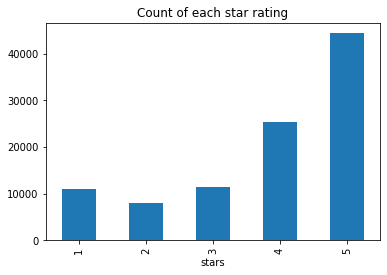

In [12]:
new_data['stars'].groupby(new_data['stars']).count().plot(kind="bar", sort_columns=True)
plt.title('Count of each star rating')

In [13]:
new_data['data len']= new_data['text'].apply(len)
Analysis11= new_data.groupby('stars').mean()
Analysis11.corr()

,useful,funny,cool,data len
useful,1.000000,0.939518,-0.882676,0.563478
funny,0.939518,1.000000,-0.882302,0.811911
cool,-0.882676,-0.882302,1.000000,-0.606532
data len,0.563478,0.811911,-0.606532,1.000000


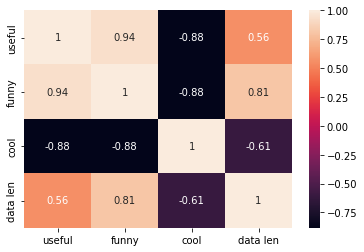

In [14]:
sns.heatmap(data=Analysis11.corr(), annot=True) #finding correlation

In [15]:
import os
import nltk
import nltk.corpus

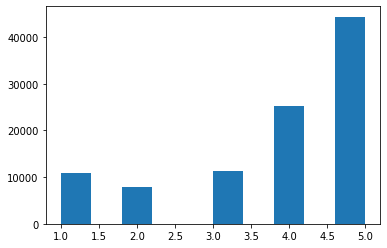

In [16]:
# Make a column and take the values, save to a variable named "target"
new_data.target = new_data.stars

plt.hist(new_data.target)
plt.show()

In [17]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = [t for i,t in enumerate(new_data.text)]

In [18]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
len(documents)

99999

In [19]:
# first metric we're going to look at is the word count for each review
new_data['Review_Word_Count'] = new_data['text'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

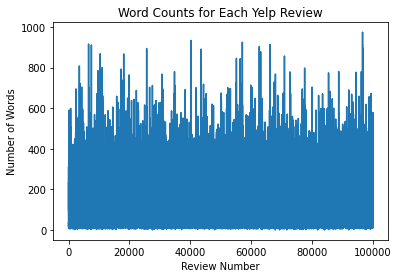

In [20]:
new_data['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

In [21]:
# character count
new_data['Review_Char_Count'] = new_data['text'].apply(lambda x: len(str(x)))

In [22]:
# Removing Stop Words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
import nltk 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# add some more columns to make the analysis easier, one column will be for lowercase reviews and the other will be for lowercase and no punctuation
new_data['Lowercase'] = new_data['text'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [25]:
new_data['Cleaned'] = new_data['Lowercase'].str.replace('[^\w\s]', '')

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
Reviews_noStopWords = []

for i in range(len(new_data)):
    
    review = str(new_data['Cleaned'][i])
    review = review
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

In [28]:
new_data['No_Stop_Words:Tokens'] = Reviews_noStopWords

In [29]:
new_data['No_Stop_Words:Sentence'] = Reviews_noStopWords
for i in range(len(new_data)): 
    text_list = new_data['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    new_data['No_Stop_Words:Sentence'][i] = blank

In [30]:
# see how many words from the original review are stop words
Stop_Word_Count = []
for i in range(len(new_data)):
    review = str(new_data['text'][i]).lower()
    
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

new_data['Stop_Word_Count'] = Stop_Word_Count

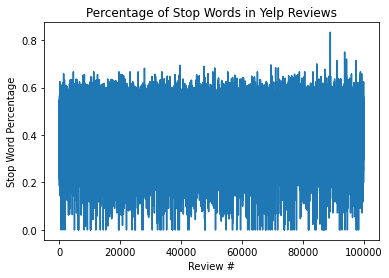

In [31]:
# calculate the percentage of stop words instead and plot that
full = new_data['Review_Word_Count']
partial = new_data['Stop_Word_Count']

new_data['Stop_Words_%'] = partial/full
new_data['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Stop Word Percentage');


In [32]:
#frequently repeated
pd.Series(''.join(new_data['No_Stop_Words:Sentence']).split()).value_counts()[:20]


food       49684
good       46180
place      45505
great      43984
service    28784
like       27477
time       26995
get        25987
one        25759
back       23987
would      23191
really     22359
go         22333
also       18486
nice       16982
best       16922
got        16901
us         16401
staff      14907
love       14867
dtype: int64

In [33]:
# Stemming and Lemmatization
import textblob
from textblob import Word

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [35]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [36]:
new_data['Lemmatized'] = new_data['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [37]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = new_data['Lemmatized'][40]
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print(sentence)
print('')
print(stemmed)

food good atmospheredecor like fishing lodge menu someplace outback bonefish went groupon 3 meal calamari appetizer ordered cooked perfectly def back

food good atmospheredecor like fish lodg menu someplac outback bonefish went groupon 3 meal calamari appet order cook perfect def back


In [38]:
import re
def word_extraction(sentence):   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [39]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(new_data)):
    sentence = new_data['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [40]:
new_data['Stemmed:Sentence'] = stemmed_list

In [41]:

for i in range(len(new_data)):
    stemmed = new_data['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [42]:
new_data['Stemmed:Tokens'] = stemmed_tokens_list

In [43]:
new_data['Stemmed:Tokens'][1]

['ive',
 'taken',
 'lot',
 'spin',
 'class',
 'year',
 'noth',
 'compar',
 'class',
 'bodi',
 'cycl',
 'nice',
 'clean',
 'space',
 'amaz',
 'bike',
 'welcom',
 'motiv',
 'instructor',
 'everi',
 'class',
 'top',
 'notch',
 'work',
 'outnnfor',
 'anyon',
 'struggl',
 'fit',
 'workout',
 'onlin',
 'schedul',
 'system',
 'make',
 'easi',
 'plan',
 'ahead',
 'there',
 'need',
 'line',
 'way',
 'advanc',
 'like',
 'mani',
 'gym',
 'make',
 'donnther',
 'way',
 'write',
 'review',
 'without',
 'give',
 'russel',
 'owner',
 'bodi',
 'cycl',
 'shout',
 'russel',
 'passion',
 'fit',
 'cycl',
 'evid',
 'desir',
 'client',
 'succeed',
 'alway',
 'drop',
 'class',
 'check',
 'inprovid',
 'encourag',
 'open',
 'idea',
 'recommend',
 'anyon',
 'russel',
 'alway',
 'wear',
 'smile',
 'face',
 'even',
 'he',
 'kick',
 'butt',
 'class']

In [44]:
new_data['Stemmed_Word_Count'] = new_data['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))

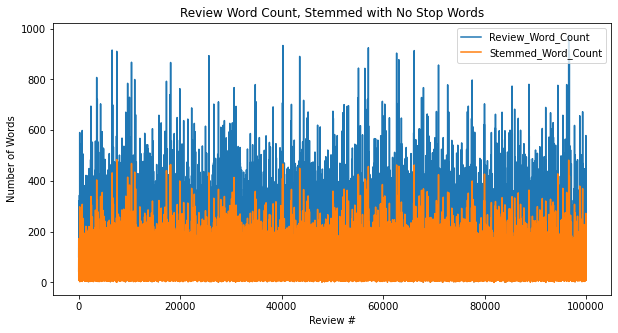

In [45]:
plt.figure(figsize=(10,5))
new_data[new_data['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
new_data[new_data['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

In [46]:
#positive opinions lexicons
positivelexicons =pd.read_csv("/content/gdrive/MyDrive/Google Colab/positive_lexicons.txt", on_bad_lines='skip')

In [47]:
positivelexicons.shape

(2005, 1)

In [48]:
positivelexicons.head()

,a+
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [50]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lex = content.splitlines()
pos_lex_stem = [snowBallStemmer.stem(word) for word in pos_lex]

In [51]:
good_count = []
for i in range(len(new_data)):
    count = 0
    tokens = new_data['Stemmed:Tokens'][i]
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    good_count.append(count)

In [52]:
new_data['Positive_Word_Count'] = good_count

In [53]:
new_data['Positive_Words_%'] = new_data['Positive_Word_Count']/(new_data['Review_Word_Count']-new_data['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

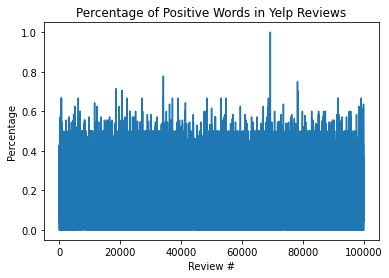

In [54]:
new_data['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

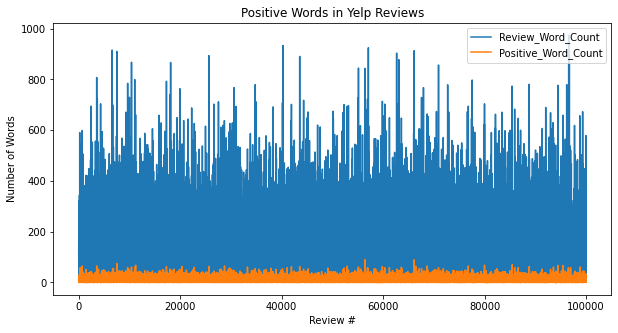

In [55]:
plt.figure(figsize=(10,5))
new_data[new_data['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
new_data[new_data['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

In [57]:
file = open("negative_lexicon.txt", "r")
content = file.read()
neg_lex = content.splitlines()
neg_lex_stem = [snowBallStemmer.stem(word) for word in neg_lex]

In [58]:
bad_count = []
for i in range(len(new_data)):
    count = 0
    tokens = new_data['Stemmed:Tokens'][i]
    for word in tokens:
        if word in neg_lex_stem:
            count += 1
    bad_count.append(count)

In [59]:
new_data['Negative_Word_Count'] = bad_count

In [60]:
new_data['Negative_Words_%'] = new_data['Negative_Word_Count']/(new_data['Review_Word_Count']-new_data['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

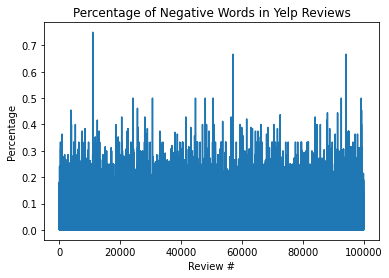

In [61]:
new_data['Negative_Words_%'].plot()
plt.title('Percentage of Negative Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

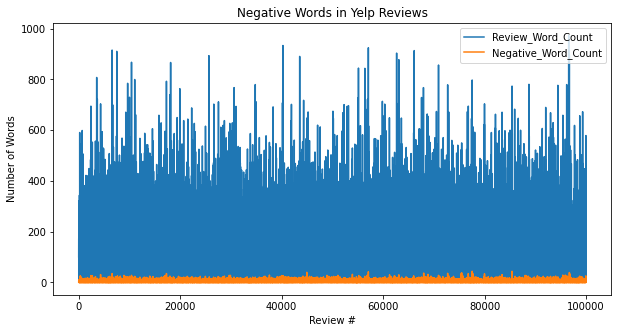

In [62]:
plt.figure(figsize=(10,5))
new_data[new_data['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
new_data[new_data['Negative_Word_Count']< 600]['Negative_Word_Count'].plot()
plt.title('Negative Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

In [63]:
bad_review = list(new_data[new_data['stars'] < 2.5]['user_id'])[0]
bad_index = list(new_data['user_id'].unique()).index(bad_review)

In [64]:
# Polarity and subjectivity
from textblob import TextBlob

In [65]:
new_data['Polarity'] = new_data['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
new_data['Subjectivity'] = new_data['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [66]:
pol = new_data[new_data['user_id'] == bad_review]['Polarity'].mean()
pol

0.2111111111111111

In [67]:
# Polarity and Positive Word Percentage
#Polarity < 0: Meaning these reviews should be negative and, therofore have a lower positive words percentage
#Polarity > 0: Where the percentage of positive words SHOULD go up
# Polarity = 0: Where the sentiment should be neutral, so the percentage should be in between the other

df1 = new_data[new_data['Polarity'] < 0]
df2 = new_data[new_data['Polarity'] > 0]
df3 = new_data[new_data['Polarity'] == 0]

df1 = df1.sort_values(by='Polarity')
df2 = df2.sort_values(by='Polarity')
df3 = df3.sort_values(by='Polarity')

df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

df3.index=np.arange(len(df1),(len(df1)+len(df3)))
df2.index=np.arange((len(df3)+len(df1)),(len(df1)+len(df3)+len(df2)))

In [68]:
df4 = new_data
df4 = df4.sort_values(by='Polarity')

Text(0, 0.5, 'Positive Word Percentage')

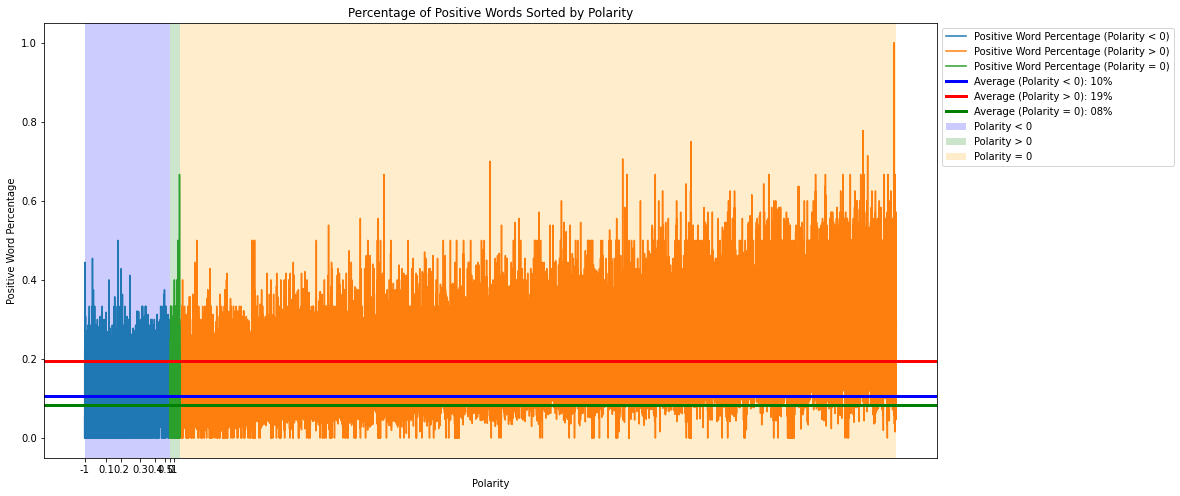

In [69]:
import matplotlib.transforms as transforms


# set up figure
fig, ax = plt.subplots(figsize=(16,8))

x = new_data.index

# set x axis for partial plots
x1 = df1.index
y1 = df1['Positive_Words_%']
x2 = df2.index
y2 = df2['Positive_Words_%']
x3 = df3.index
y3 = df3['Positive_Words_%']

# calculate average for each partial
av1 = df1['Positive_Words_%'].mean()
av2 = df2['Positive_Words_%'].mean()
av3 = df3['Positive_Words_%'].mean()

# plot word percentage
plt.plot(x1,y1,label='Positive Word Percentage (Polarity < 0)')
plt.plot(x2,y2,label='Positive Word Percentage (Polarity > 0)')
plt.plot(x3,y3,label='Positive Word Percentage (Polarity = 0)')

# plot area to define polarity zones
plt.axvspan(0,len(df1), facecolor='blue', alpha=0.2,label='Polarity < 0')
plt.axvspan(len(df1),(len(df1)+len(df3)), facecolor='green',alpha=0.2,label='Polarity > 0')
plt.axvspan((len(df1)+len(df3)),(len(df1)+len(df3)+len(df2)), facecolor='orange',alpha=0.2, label='Polarity = 0')

# plot average lines
plt.axhline(y=av1,linewidth=3, color='b',label='Average (Polarity < 0): '+str(av1)[2:4]+'%')
plt.axhline(y=av2,linewidth=3, color='r',label='Average (Polarity > 0): '+str(av2)[2:4]+'%')
plt.axhline(y=av3,linewidth=3, color='g',label='Average (Polarity = 0): '+str(av3)[2:4]+'%')

# label x axis as polarity
labels = ['-1','0','0.1','0.2','0.3','0.4','0.5','1']
ticks = [0,len(df1),2655,4539,6869,8704,9924,11065]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage of Positive Words Sorted by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Positive Word Percentage')

In [70]:
new_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'data len', 'Review_Word_Count',
       'Review_Char_Count', 'Lowercase', 'Cleaned', 'No_Stop_Words:Tokens',
       'No_Stop_Words:Sentence', 'Stop_Word_Count', 'Stop_Words_%',
       'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%',
       'Negative_Word_Count', 'Negative_Words_%', 'Polarity', 'Subjectivity'],
      dtype='object')

In [71]:
new_data_analyzed = new_data[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'data len', 'Review_Word_Count',
       'Review_Char_Count', 'Lowercase', 'Cleaned', 'No_Stop_Words:Tokens',
       'No_Stop_Words:Sentence', 'Stop_Word_Count', 'Stop_Words_%',
       'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%', 'Negative_Word_Count', 'Negative_Words_%', 'Polarity', 'Subjectivity']]

In [72]:
new_data_analyzed.to_csv(r'new_data_analyzed.csv',index=False)

In [73]:
new_data_analyzed.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,decide eat aware going take 2 hour beginning e...,decid eat awar go take 2 hour begin end tri mu...,"[decid, eat, awar, go, take, 2, hour, begin, e...",45,8,0.166667,3,0.062500,0.198485,0.412121
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,834,...,ive taken lot spin class year nothing compare ...,ive taken lot spin class year noth compar clas...,"[ive, taken, lot, spin, class, year, noth, com...",84,18,0.206897,1,0.011494,0.395455,0.571212
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,339,...,family diner buffet eclectic assortment large ...,famili diner buffet eclect assort larg chicken...,"[famili, diner, buffet, eclect, assort, larg, ...",39,6,0.150000,2,0.050000,0.139935,0.522294
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,243,...,wow yummy different delicious favorite lamb cu...,wow yummi differ delici favorit lamb curri kor...,"[wow, yummi, differ, delici, favorit, lamb, cu...",24,5,0.208333,2,0.083333,0.315152,0.733838
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,535,...,cute interior owner gave u tour upcoming patio...,cute interior owner gave u tour upcom patioroo...,"[cute, interior, owner, gave, u, tour, upcom, ...",63,12,0.190476,1,0.015873,0.416234,0.490260
